In [1]:
import community as community_louvain
import igraph as ig
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import networkx as nx

from networkx.algorithms import community as communitydetect
import re 

In [3]:
# final kmatrix
with open('/Users/arjuns/Downloads/code_res_paper/paper-results-code/weisfeilerlehman/final_kernel_matrix/complete_kernel_matrix_v2.pkl', 'rb') as f:
    kmatrix = pickle.load(f)

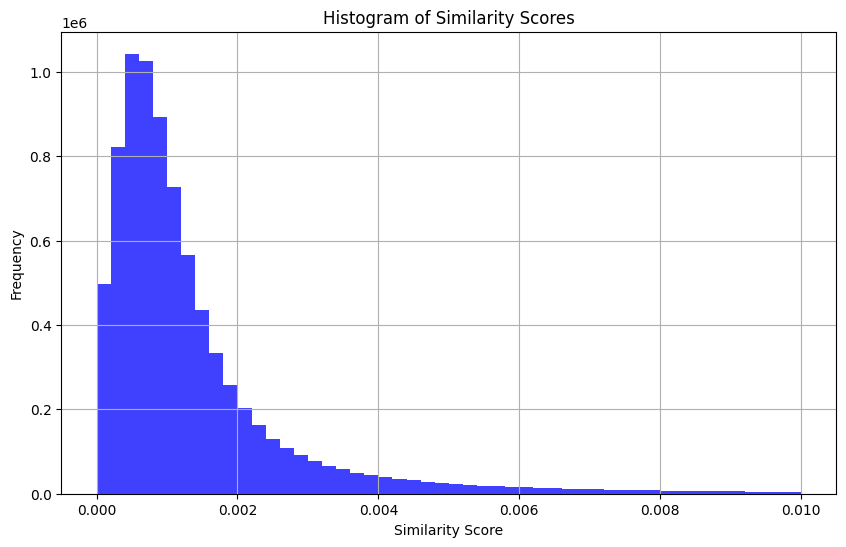

In [4]:
similarity_matrix = np.array(kmatrix)
similarity_matrix = (similarity_matrix + similarity_matrix.T) / 2

np.fill_diagonal(similarity_matrix, 0) # Remove self-similarities

# Flatten the matrix and remove zero values (self-similarities already removed)
similarity_scores = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]

plt.figure(figsize=(10, 6))
plt.hist(similarity_scores, bins=50, alpha=0.75, color='blue', range=(0, 0.01))
plt.title('Histogram of Similarity Scores')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [5]:
with open('./aux/inflection_points.pkl', 'rb') as f:
    inflection_points = pickle.load(f)

In [23]:
bp = "/Users/arjuns/Downloads/notebooks_v2/v2/graphs"
list_of_files = glob.glob(f'{bp}/*/*.graphml')

files_with_no_nodes = [
    f'{bp}/Technology/learnmachinelearning.json.graphml',
    f'{bp}/Technology/DataHoarder.json.graphml',
    f'{bp}/Technology/talesfromtechsupport.json.graphml',
    f'{bp}/Technology/technews.json.graphml',
    f'{bp}/Technology/apolloapp.json.graphml',
    f'{bp}/Technology/ipad.json.graphml',
    f'{bp}/Technology/onions.json.graphml',
    f'{bp}/Technology/Windows10.json.graphml',
    f'{bp}/Art/AnalogCommunity.json.graphml',
    f'{bp}/Art/iWallpaper.json.graphml',
    f'{bp}/Art/ImaginaryHorrors.json.graphml',
    f'{bp}/Art/pic.json.graphml',
    f'{bp}/Art/ArtHistory.json.graphml',
    f'{bp}/Art/80s.json.graphml',
    f'{bp}/Art/Pyrography.json.graphml',
    f'{bp}/Art/blenderhelp.json.graphml',
    f'{bp}/Art/MobileWallpaper.json.graphml',
    f'{bp}/Art/wallpaperengine.json.graphml'
]
# Remove files with no nodes
list_of_files = [file for file in list_of_files if file not in files_with_no_nodes]

In [24]:
print(len(list_of_files))

4032


In [25]:
inflection_points

[0.0036136136136136134,
 0.004194194194194194,
 0.004824824824824825,
 0.005205205205205205,
 0.005495495495495496,
 0.005995995995995996,
 0.006666666666666666,
 0.007417417417417417,
 0.007787787787787787,
 0.008128128128128128,
 0.008558558558558558,
 0.009219219219219218,
 0.00965965965965966,
 0.0035135135135135136,
 0.004024024024024024,
 0.004454454454454454,
 0.005045045045045045,
 0.005335335335335335,
 0.005735735735735736,
 0.006286286286286286,
 0.007177177177177177,
 0.007587587587587588,
 0.008008008008008008,
 0.008308308308308308,
 0.008948948948948949,
 0.009429429429429429,
 0.0098998998998999,
 0.00476995213776347,
 0.004]

In [26]:
inflection_points

[0.0036136136136136134,
 0.004194194194194194,
 0.004824824824824825,
 0.005205205205205205,
 0.005495495495495496,
 0.005995995995995996,
 0.006666666666666666,
 0.007417417417417417,
 0.007787787787787787,
 0.008128128128128128,
 0.008558558558558558,
 0.009219219219219218,
 0.00965965965965966,
 0.0035135135135135136,
 0.004024024024024024,
 0.004454454454454454,
 0.005045045045045045,
 0.005335335335335335,
 0.005735735735735736,
 0.006286286286286286,
 0.007177177177177177,
 0.007587587587587588,
 0.008008008008008008,
 0.008308308308308308,
 0.008948948948948949,
 0.009429429429429429,
 0.0098998998998999,
 0.00476995213776347,
 0.004]

In [27]:
inflection_points = [x for x in inflection_points if x not in [2.002002002002002e-05, 0.00048048048048048047, 0.0014614614614614613, 0.004]]

In [28]:
def name_processing(name):
    aux = name.split("/")
    return aux[-2] + "/" , aux[-1].split(".")[0]

graphs = {}
for threshold in inflection_points:
    print(f"Processing threshold: {threshold}")
    G = nx.Graph()

    for graph in list_of_files:
        topic, subreddit = name_processing(graph)
        G.add_node(graph)
        G.nodes[graph]['topic'] = topic
        G.nodes[graph]['subreddit'] = subreddit

    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if similarity_matrix[i][j] > threshold:
                G.add_edge(list_of_files[i], list_of_files[j], weight=similarity_matrix[i][j])

    graphs[threshold] = G


Processing threshold: 0.0036136136136136134
Processing threshold: 0.004194194194194194
Processing threshold: 0.004824824824824825
Processing threshold: 0.005205205205205205
Processing threshold: 0.005495495495495496
Processing threshold: 0.005995995995995996
Processing threshold: 0.006666666666666666
Processing threshold: 0.007417417417417417
Processing threshold: 0.007787787787787787
Processing threshold: 0.008128128128128128
Processing threshold: 0.008558558558558558
Processing threshold: 0.009219219219219218
Processing threshold: 0.00965965965965966
Processing threshold: 0.0035135135135135136
Processing threshold: 0.004024024024024024
Processing threshold: 0.004454454454454454
Processing threshold: 0.005045045045045045
Processing threshold: 0.005335335335335335
Processing threshold: 0.005735735735735736
Processing threshold: 0.006286286286286286
Processing threshold: 0.007177177177177177
Processing threshold: 0.007587587587587588
Processing threshold: 0.008008008008008008
Processing

In [30]:
# do a sanity check on whether all graph nodes attributes are non -empty
for threshold, G in graphs.items():
    for node in G.nodes:
        if G.nodes[node] == {}:
            print(f"Empty node found in graph with threshold {threshold}")
            break
    print(f"Graph with threshold {threshold} is ok")

Graph with threshold 0.0036136136136136134 is ok
Graph with threshold 0.004194194194194194 is ok
Graph with threshold 0.004824824824824825 is ok
Graph with threshold 0.005205205205205205 is ok
Graph with threshold 0.005495495495495496 is ok
Graph with threshold 0.005995995995995996 is ok
Graph with threshold 0.006666666666666666 is ok
Graph with threshold 0.007417417417417417 is ok
Graph with threshold 0.007787787787787787 is ok
Graph with threshold 0.008128128128128128 is ok
Graph with threshold 0.008558558558558558 is ok
Graph with threshold 0.009219219219219218 is ok
Graph with threshold 0.00965965965965966 is ok
Graph with threshold 0.0035135135135135136 is ok
Graph with threshold 0.004024024024024024 is ok
Graph with threshold 0.004454454454454454 is ok
Graph with threshold 0.005045045045045045 is ok
Graph with threshold 0.005335335335335335 is ok
Graph with threshold 0.005735735735735736 is ok
Graph with threshold 0.006286286286286286 is ok
Graph with threshold 0.0071771771771771

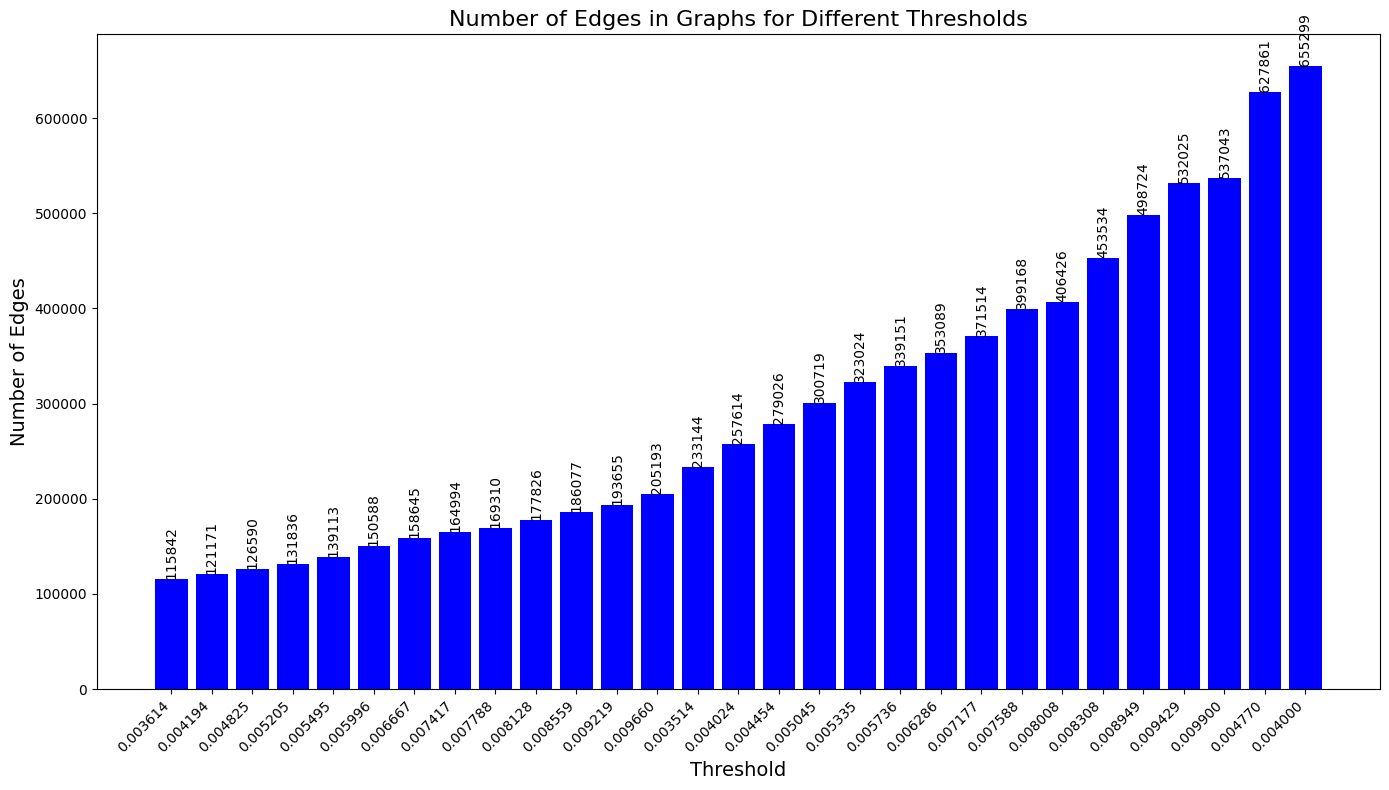

In [31]:
# inflection_test_points = np.array([0.01281198, 0.01119356, 0.01498934, 0.01607281, 0.01590291, 0.01804706])

all_points = inflection_points

# Calculate the number of edges for each graph
edge_counts = sorted([len(graphs[threshold].edges) for threshold in all_points])

# Determine colors for each threshold point
colors = ['blue' if threshold in inflection_points else 'red' for threshold in all_points]

# Create a new figure with a larger size
plt.figure(figsize=(14, 8))

# Plot the bar chart
bars = plt.bar(range(len(all_points)), edge_counts, color=colors)

# Add text labels to each bar for better visibility
for bar, count in zip(bars, edge_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{count}', 
             ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Set the x-ticks and rotate them for better readability
plt.xticks(range(len(all_points)), [f"{point:.6f}" for point in all_points], rotation=45, ha='right', fontsize=10)

# Add labels and title with increased font size
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Number of Edges', fontsize=14)
plt.title('Number of Edges in Graphs for Different Thresholds', fontsize=16)

# Adjust the margins to prevent the x-tick labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


In [32]:
graphs

{0.0036136136136136134: <networkx.classes.graph.Graph at 0x13e098e20>,
 0.004194194194194194: <networkx.classes.graph.Graph at 0x12eb9ff70>,
 0.004824824824824825: <networkx.classes.graph.Graph at 0x12eb9ffa0>,
 0.005205205205205205: <networkx.classes.graph.Graph at 0x12ec32fe0>,
 0.005495495495495496: <networkx.classes.graph.Graph at 0x12ebd75b0>,
 0.005995995995995996: <networkx.classes.graph.Graph at 0x12eaae110>,
 0.006666666666666666: <networkx.classes.graph.Graph at 0x12eaaf610>,
 0.007417417417417417: <networkx.classes.graph.Graph at 0x12eaae320>,
 0.007787787787787787: <networkx.classes.graph.Graph at 0x12eaae230>,
 0.008128128128128128: <networkx.classes.graph.Graph at 0x12eaad6c0>,
 0.008558558558558558: <networkx.classes.graph.Graph at 0x12eb4e830>,
 0.009219219219219218: <networkx.classes.graph.Graph at 0x12eb4cd00>,
 0.00965965965965966: <networkx.classes.graph.Graph at 0x12eaadd80>,
 0.0035135135135135136: <networkx.classes.graph.Graph at 0x12ec190f0>,
 0.0040240240240240

In [33]:
true_categories = {
    list_of_files[i].split("/")[-1].split(".")[0] : list_of_files[i].split("/")[-2] for i in range(len(list_of_files))
}
true_categories

{'teenagersbuthot': 'Internet Culture and Memes',
 'AsbestosRemovalMemes': 'Internet Culture and Memes',
 'sadlygokarts': 'Internet Culture and Memes',
 'peopleofwalmart': 'Internet Culture and Memes',
 'ani_bm': 'Internet Culture and Memes',
 'memesopdidnotlike': 'Internet Culture and Memes',
 'LTB_iel': 'Internet Culture and Memes',
 'MAAU': 'Internet Culture and Memes',
 'oddlymesmerizing': 'Internet Culture and Memes',
 'schizoposters': 'Internet Culture and Memes',
 'okbuddyphd': 'Internet Culture and Memes',
 'FindTheSniper': 'Internet Culture and Memes',
 'AllThatIsInteresting': 'Internet Culture and Memes',
 'VeryExpensive': 'Internet Culture and Memes',
 'whereintheworld': 'Internet Culture and Memes',
 'antimeme': 'Internet Culture and Memes',
 'Indiangirlsontinder': 'Internet Culture and Memes',
 'BLAHAJ': 'Internet Culture and Memes',
 'Daniellarson': 'Internet Culture and Memes',
 'evilbuildings': 'Internet Culture and Memes',
 'xkcd': 'Internet Culture and Memes',
 'ThatP

In [34]:
def community_detection_louvain(G):
    partition = community_louvain.best_partition(G)
    sorted_partition = sorted(partition.items(), key=lambda kv: kv[1])
    partition_dict = {}
    for k, v in sorted_partition:
        if v not in partition_dict:
            partition_dict[v] = []
        partition_dict[v].append(k)
    
    return partition_dict 
def community_detection_girvan_newman(G):
    communities_generator = communitydetect.girvan_newman(G)
    top_level_communities = next(communities_generator)
    next_level_communities = next(communities_generator)
    sorted(map(sorted, next_level_communities))
    partition_dict = {}
    for i, community in enumerate(next_level_communities):
        for node in community:
            if i not in partition_dict:
                partition_dict[i] = []
            partition_dict[i].append(node)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    
    return partition_dict


In [35]:
def community_detection_label_propagation(G):
    communities = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    communities_list = list(communities)
    partition_dict = {}
    for i, community in enumerate(communities_list):
        partition_dict[i] = list(community)
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    return partition_dict
def community_detection_fast_greedy(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_fastgreedy()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

In [36]:
def community_detection_leading_eigenvector(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_leading_eigenvector()
    partition_dict = {}
    for i, community in enumerate(communities):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k

    return partition_dict
def community_detection_walktrap(G):
    ig_graph = ig.Graph(directed=False)
    ig_graph.add_vertices(list(G.nodes()))
    ig_graph.add_edges(list(G.edges()))
    communities = ig_graph.community_walktrap()
    clusters = communities.as_clustering()
    partition_dict = {}
    for i, community in enumerate(clusters):
        partition_dict[i] = [list(G.nodes())[node] for node in community]
    partition = {}
    for k, v in partition_dict.items():
        for node in v:
            partition[node] = k
    
    return partition_dict

In [37]:
def remove_outliers(partition_dict):
    temporary_partition_dict = partition_dict.copy()
    community_sizes = np.array([len(v) for v in partition_dict.values() if len(v) > 1])
    Q1 = np.percentile(community_sizes, 25)
    Q3 = np.percentile(community_sizes, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    partition_dict = {k: v for k, v in partition_dict.items() if len(v) >= lower_bound and len(v) <= upper_bound and len(v) > 1}
    return partition_dict, temporary_partition_dict
from collections import Counter

def get_homogeneity_scores(partition_dict):
    mean_homogeneity = 0
    median_homogeneity = 0
    homogeneity_scores = {}
    for community_id, subreddits in partition_dict.items():
        categories = [true_categories[subreddit.split("/")[-1].split(".")[0]] for subreddit in subreddits if subreddit.split("/")[-1].split(".")[0] in true_categories]
        category_counts = Counter(categories)
        if category_counts:
            most_common_category, most_common_count = category_counts.most_common(1)[0]
            homogeneity = most_common_count / len(categories)
        else:
            homogeneity = 0

        homogeneity_scores[community_id] = homogeneity

    mean_homogeneity = np.mean(list(homogeneity_scores.values()))
    median_homogeneity = np.median(list(homogeneity_scores.values()))
    return mean_homogeneity, median_homogeneity



In [38]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, f1_score
from collections import Counter

def calculate_community_metrics(partition_dict):
    # Prepare data structures for metrics calculation
    true_labels = []
    predicted_labels = []
    y_true = []
    y_pred = []
    
    for comm_id, subreddits in partition_dict.items():
        # For NMI/ARI (cluster matching)
        comm_categories = []
        
        # For F1 (category prediction)
        for subreddit in subreddits:
            sub_name = subreddit.split("/")[-1].split(".")[0]
            if sub_name in true_categories:
                true_cat = true_categories[sub_name]
                true_labels.append(true_cat)
                predicted_labels.append(comm_id)  # Community ID as cluster label
                comm_categories.append(true_cat)
        
        # Get majority category for F1 prediction
        if comm_categories:
            majority_category = Counter(comm_categories).most_common(1)[0][0]
            y_pred.extend([majority_category]*len(comm_categories))
            y_true.extend(comm_categories)
    
    # Calculate metrics
    nmi = normalized_mutual_info_score(true_labels, predicted_labels)
    ari = adjusted_rand_score(true_labels, predicted_labels)
    f1 = f1_score(y_true, y_pred, average='macro') if y_true else 0.0
    
    return nmi, ari, f1

In [39]:
community_detection_algorithms = ['louvain', 'label_propagation', 'fast_greedy', 'leading_eigenvector', 'walktrap'] #, 'girvan_newman', ]
# community_detection_algorithms = ['girvan_newman']

In [40]:
def validate_partition(G, partition):
    """ Ensure every node is covered exactly once in the partition. """
    all_nodes = set(G.nodes())
    covered_nodes = set()
    for community in partition:
        if not community:  # Skip empty communities if any
            continue
        community_set = set(community)
        if not covered_nodes.isdisjoint(community_set):
            raise ValueError("Overlap detected in communities")
        covered_nodes.update(community_set)

    if covered_nodes != all_nodes:
        raise ValueError("Partition does not cover all nodes")

In [ ]:
import logging
from collections import defaultdict

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

# Define data structures for metrics
metrics = defaultdict(lambda: defaultdict(dict))

for algorithm in community_detection_algorithms:
    for threshold, G in graphs.items():
        logger.info(f"Processing algorithm: {algorithm}, threshold: {threshold}")
        try:
            # Community detection
            if algorithm == 'louvain':
                partition = community_detection_louvain(G)
            elif algorithm == 'girvan_newman':
                partition = community_detection_girvan_newman(G)
            elif algorithm == 'label_propagation':
                partition = community_detection_label_propagation(G)
            elif algorithm == 'fast_greedy':
                partition = community_detection_fast_greedy(G)
            elif algorithm == 'leading_eigenvector':
                partition = community_detection_leading_eigenvector(G)
            elif algorithm == 'walktrap':
                partition = community_detection_walktrap(G)
        except Exception as e:
            logger.error(f"Error in {algorithm} for threshold {threshold}: {e}")
            continue

        # Remove outliers
        partition, original = remove_outliers(partition)

        if len(partition) <= 1:
            logger.warning(f"Skipping {algorithm} for threshold {threshold}: partition has 1 or fewer communities")
            continue

        # Calculate existing metrics
        mean_homogeneity, median_homogeneity = get_homogeneity_scores(partition)
        nmi, ari, f1 = calculate_community_metrics(partition)
        modularity = communitydetect.modularity(G, [list(v) for v in original.values()])

        metrics[algorithm][threshold]["modularity"] = modularity
        metrics[algorithm][threshold]["mean_homogeneity"] = mean_homogeneity
        metrics[algorithm][threshold]["median_homogeneity"] = median_homogeneity
        metrics[algorithm][threshold]["nmi"] = nmi
        metrics[algorithm][threshold]["ari"] = ari
        metrics[algorithm][threshold]["f1"] = f1

        logger.info(f"Metrics calculated for {algorithm} at threshold {threshold}")
        logger.info(f"Modularity: {modularity}, Mean Homogeneity: {mean_homogeneity}, Median Homogeneity: {median_homogeneity}")
        logger.info(f"NMI: {nmi}, ARI: {ari}, F1: {f1}")

logger.info("Processing completed for all algorithms and thresholds.")


2025-01-29 18:31:09,990 - INFO - Processing algorithm: louvain, threshold: 0.0036136136136136134
2025-01-29 18:31:23,055 - INFO - Metrics calculated for louvain at threshold 0.0036136136136136134
2025-01-29 18:31:23,057 - INFO - Modularity: 0.3229909743590621, Mean Homogeneity: 0.5929584197404434, Median Homogeneity: 0.7116564417177914
2025-01-29 18:31:23,058 - INFO - NMI: 0.49765692643743537, ARI: 0.4264552848601493, F1: 0.357787417139459
2025-01-29 18:31:23,058 - INFO - Processing algorithm: louvain, threshold: 0.004194194194194194
2025-01-29 18:31:36,032 - INFO - Metrics calculated for louvain at threshold 0.004194194194194194
2025-01-29 18:31:36,034 - INFO - Modularity: 0.34494596256536786, Mean Homogeneity: 0.5549332741675412, Median Homogeneity: 0.5654477561730471
2025-01-29 18:31:36,034 - INFO - NMI: 0.4492091957033938, ARI: 0.2915499770857967, F1: 0.3177584319919267
2025-01-29 18:31:36,034 - INFO - Processing algorithm: louvain, threshold: 0.004824824824824825
2025-01-29 18:31:

In [47]:
metrics_c = dict(metrics)
# save metrics to ./metrics/cd_metrics.pkl
with open('./metrics/cd_metrics.pkl', 'wb') as f:
    pickle.dump(metrics_c, f)

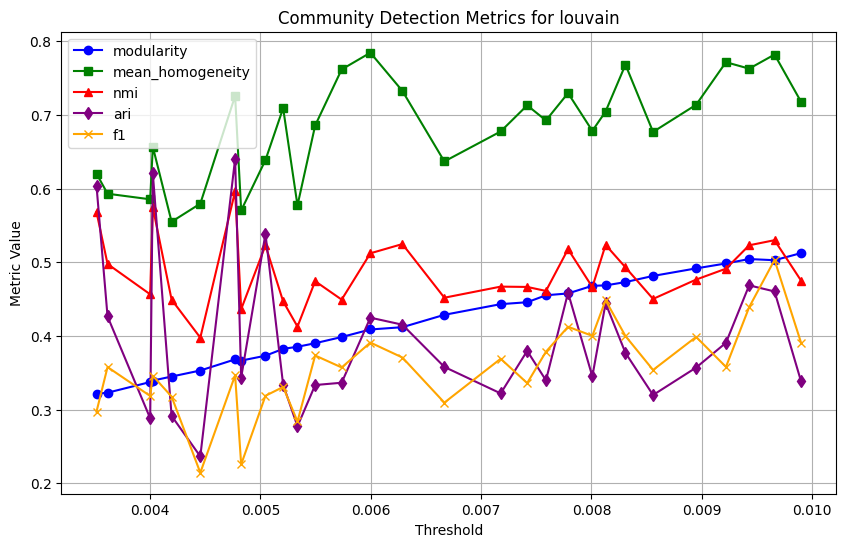

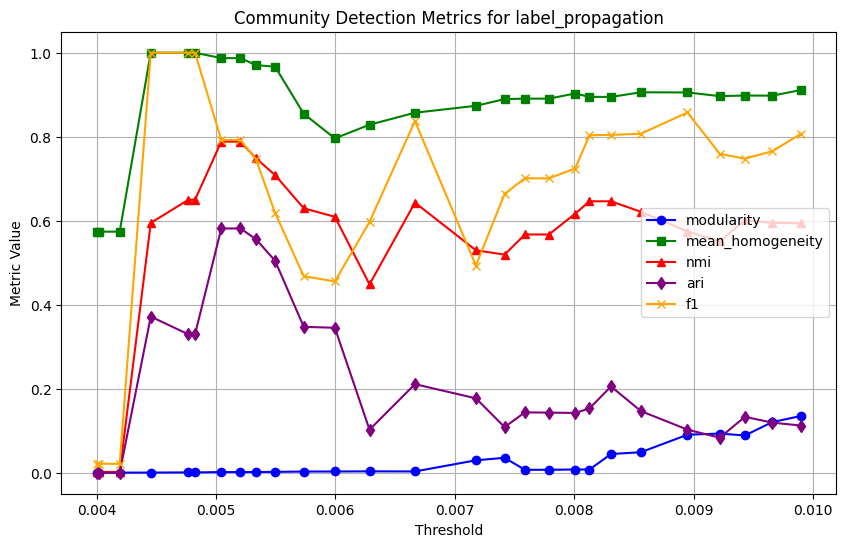

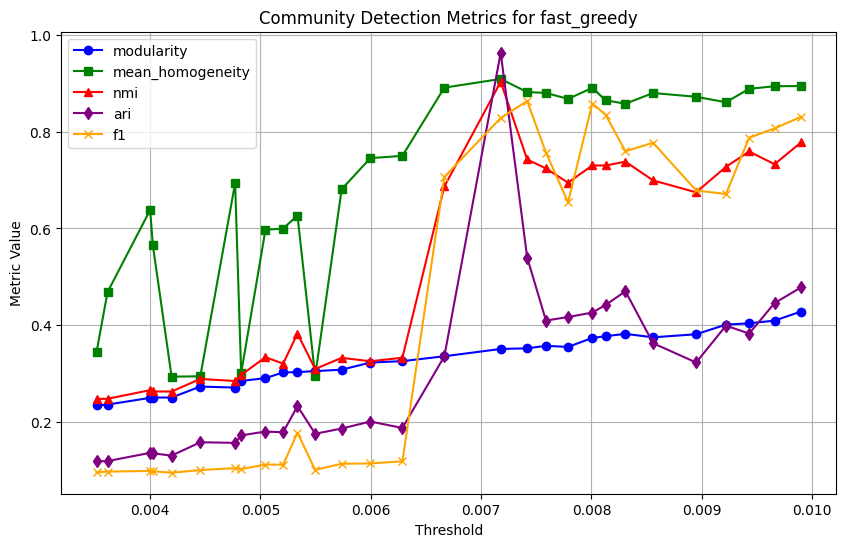

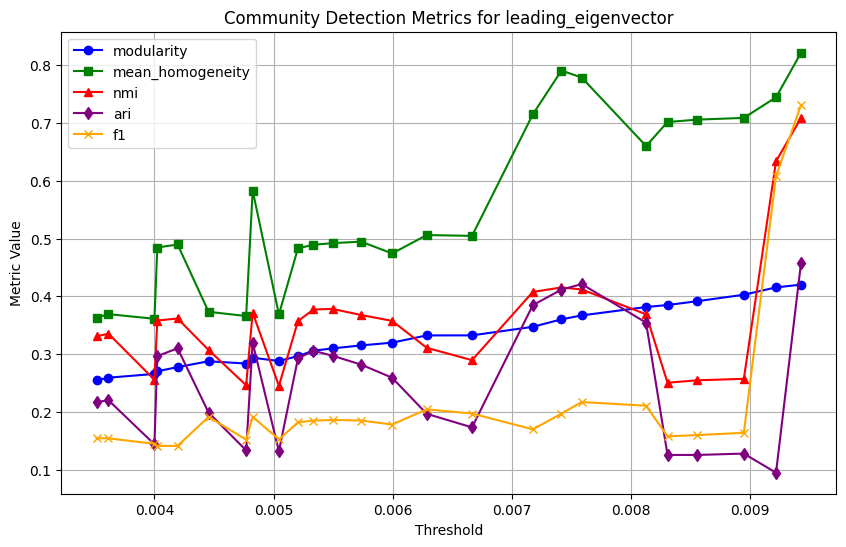

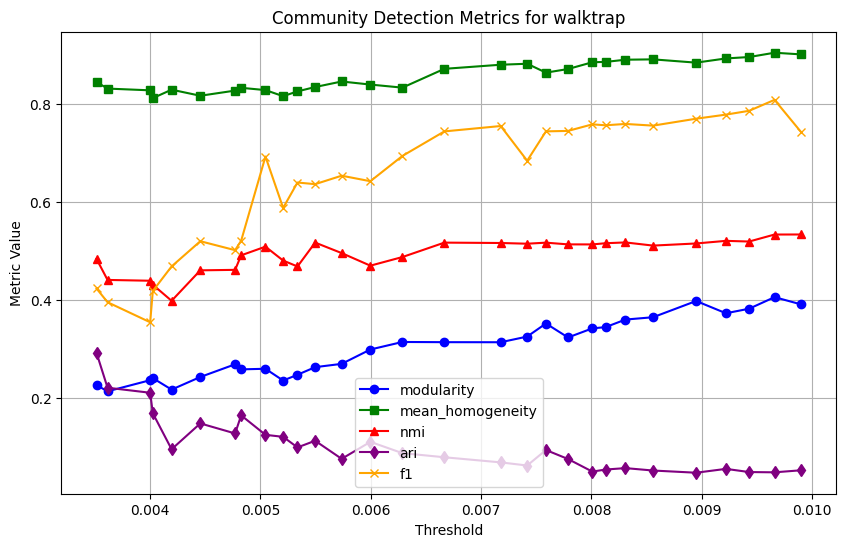

In [48]:
import matplotlib.pyplot as plt

# Define colors and markers for each metric
metric_styles = {
    "modularity": ("blue", "o"),
    "mean_homogeneity": ("green", "s"),
    "nmi": ("red", "^"),
    "ari": ("purple", "d"),
    "f1": ("orange", "x")
}

# Plot metrics for each algorithm
for algorithm in metrics:
    plt.figure(figsize=(10, 6))
    
    thresholds = sorted(metrics[algorithm].keys())  # Sort thresholds for proper plotting
    
    for metric, (color, marker) in metric_styles.items():
        values = [metrics[algorithm][t][metric] for t in thresholds]  # Extract metric values
        plt.plot(thresholds, values, label=metric, color=color, marker=marker, linestyle='-')

    # Formatting the plot
    plt.xlabel("Threshold")
    plt.ylabel("Metric Value")
    plt.title(f"Community Detection Metrics for {algorithm}")
    plt.legend()
    plt.grid(True)

    # Show or save the plot
    plt.show()

In [51]:
best_thresholds = {}

# Identify best threshold for each algorithm
for algorithm in metrics:
    best_threshold = None
    best_score = float('-inf')  # Initialize with the lowest possible score
    
    for threshold in metrics[algorithm]:
        # Calculate the overall score (sum of selected metrics)
        score = (
            metrics[algorithm][threshold]["modularity"]
            + metrics[algorithm][threshold]["mean_homogeneity"]
            + metrics[algorithm][threshold]["nmi"]
            + metrics[algorithm][threshold]["ari"]
            + metrics[algorithm][threshold]["f1"]
        )

        # Update best threshold if the score improves
        if score > best_score:
            best_score = score
            best_threshold = threshold

    best_thresholds[algorithm] = best_threshold

    # Print all metrics for the best threshold
    best_metrics = metrics[algorithm][best_threshold]
    print(f"Best threshold for {algorithm}: {best_threshold}")
    print(f"Modularity: {best_metrics['modularity']}")
    print(f"Mean Homogeneity: {best_metrics['mean_homogeneity']}")
    print(f"NMI: {best_metrics['nmi']}")
    print(f"ARI: {best_metrics['ari']}")
    print(f"F1: {best_metrics['f1']}")
    print("="*50)


Best threshold for louvain: 0.00965965965965966
Modularity: 0.5027430837675503
Mean Homogeneity: 0.7817634882978542
NMI: 0.5299165084078483
ARI: 0.46036948736136607
F1: 0.5031835355825507
Best threshold for label_propagation: 0.005205205205205205
Modularity: 0.001463038659606673
Mean Homogeneity: 0.9871794871794872
NMI: 0.7882884213629178
ARI: 0.5815140629691827
F1: 0.792
Best threshold for fast_greedy: 0.007177177177177177
Modularity: 0.35060448983665354
Mean Homogeneity: 0.9090909090909091
NMI: 0.9031717415701271
ARI: 0.9633770892375803
F1: 0.8283313325330132
Best threshold for leading_eigenvector: 0.009429429429429429
Modularity: 0.42010887621772897
Mean Homogeneity: 0.821655328798186
NMI: 0.7088494590809216
ARI: 0.45827732595808873
F1: 0.7313668448679891
Best threshold for walktrap: 0.00965965965965966
Modularity: 0.4060421504071366
Mean Homogeneity: 0.9052543158382574
NMI: 0.5339242198308524
ARI: 0.04826253234020507
F1: 0.8090017294268702


In [ ]:
# save all graphs in l2_graphs folder
for threshold, graph in graphs.items():
    nx.write_graphml(graph, f'../l2_graphs/{threshold}.graphml')